In [14]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [35]:
from proj1_helpers import *
import os
DATA_TRAIN_PATH = 'train.csv' # TODO: download train data and supply path here 
y, tX, ids, headers = load_csv_data(DATA_TRAIN_PATH)

In [36]:
print(headers.shape)
print(headers)

(30,)
['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet' 'DER_prodeta_jet_jet'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'DER_lep_eta_centrality' 'PRI_tau_pt'
 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi'
 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_num'
 'PRI_jet_leading_pt' 'PRI_jet_leading_eta' 'PRI_jet_leading_phi'
 'PRI_jet_subleading_pt' 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi'
 'PRI_jet_all_pt']


## Exploratory Data Analysis

In [37]:
print(y.shape)
print(tX.shape)

(250000,)
(250000, 30)


It seems like missing values are equal to -999 in the dataset. Let's count how many there are in each feature:

In [38]:
count_missing = np.count_nonzero(tX == -999, axis=0)
print(count_missing)
cols_missing = np.where(count_missing != 0)
print(cols_missing)

[ 38114      0      0      0 177457 177457 177457      0      0      0
      0      0 177457      0      0      0      0      0      0      0
      0      0      0  99913  99913  99913 177457 177457 177457      0]
(array([ 0,  4,  5,  6, 12, 23, 24, 25, 26, 27, 28], dtype=int64),)


Eleven of the 30 features have a significant amount of -999 values. Now we can count any zeros:

In [21]:
print(np.count_nonzero(tX == 0, axis=0))

[    0     3     0    41     6     0    58     0    39     0     0    53
 15752     0     0    32     0    35    33     0    44     0 99913     0
    26    19     0     9    10 99913]


In [22]:
# Check for NaNs
np.isnan(np.sum(tX))
# If false, there are no NaN values

False

Here, I removed features with -999 values, but we will re-do this after and keep them

In [39]:
tX_reduced = tX.copy()
tX_reduced = np.delete(tX_reduced, cols_missing, axis = 1)
headers_reduced = np.delete(headers, cols_missing)
print(tX.shape)
print(tX_reduced.shape)

(250000, 30)
(250000, 19)


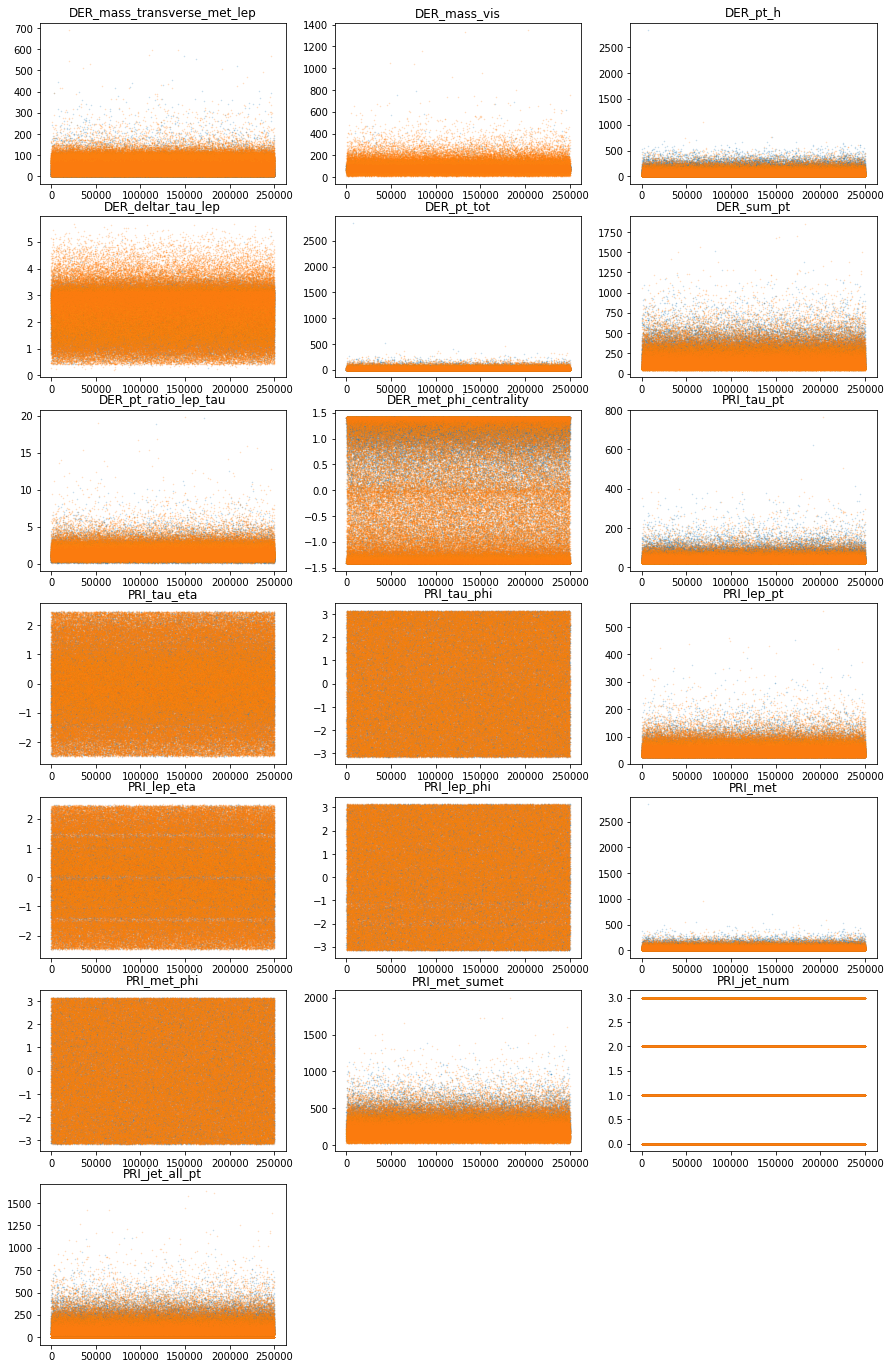

In [24]:
ids_yes = np.where(y == 1)
ids_no = np.where(y == -1)

fig = plt.figure(figsize = (15,35))
msize = 0.25
for i in range(tX_reduced.shape[1]):
    ax = fig.add_subplot(10,3, i+1)
    plt.scatter(ids_yes, tX_reduced[ids_yes, i], s=msize, label = "Yes", alpha = 0.25)
    plt.scatter(ids_no, tX_reduced[ids_no, i], s=msize, label = "No", alpha = 0.25)
    #plt.legend()
    plt.title(headers_reduced[i])

From the above plots, it is clear that the features will need to be normalized at the scales of some are way larger than others. There seems to be clear outliers in the PRI_met (column 14), DER_pt_tot (column 4) and DER_pt_h (column 2). It seems that the outliers in both the these DERIVED columns stem from the outiler in the PRIMITIVE column PRI_met. We will isolate this point and see if it is indeed the same point in the three features.

In [25]:
print(np.argmax(tX_reduced[:, 2]))
print(np.argmax(tX_reduced[:, 4]))
print(np.argmax(tX_reduced[:, 14]))
print(tX_reduced[:, 2][np.argmax(tX_reduced[:, 2])])


7343
7343
7343
2834.999


In [40]:
# remove this value 7343
tX_reduced = np.delete(tX_reduced, 7343, axis = 0)
y = np.delete(y, 7343, axis = 0)
ids = np.delete(ids, 7343)
print(tX_reduced.shape)
print(y.shape)
print(ids.shape)

(249999, 19)
(249999,)
(249999,)


Text(0.5, 1.0, 'DER_deltar_tau_lep')

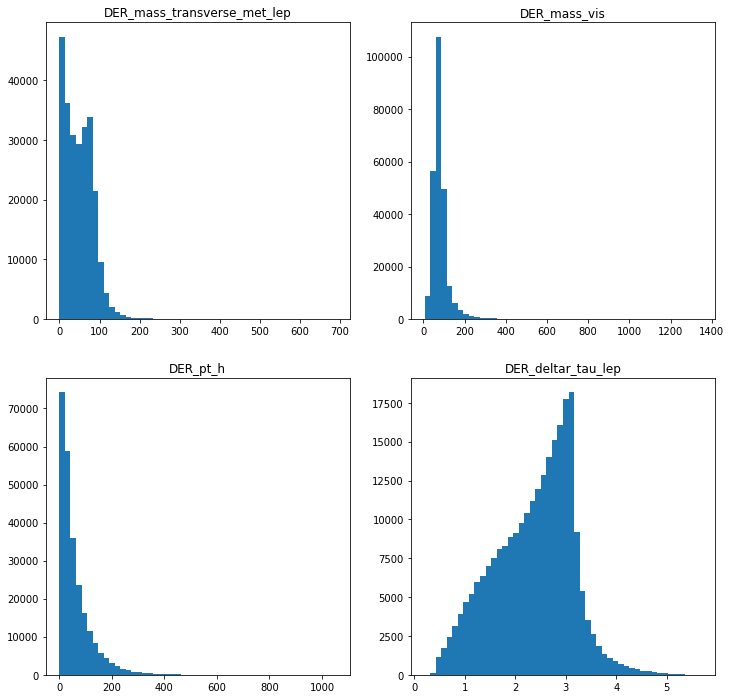

In [28]:
fig = plt.figure(figsize = (12,12))
plt.figure(1)
plt.subplot(221)
plt.hist(tX_reduced[:,0], 50, density=False);
plt.title(headers_reduced[0])
plt.subplot(222)
plt.hist(tX_reduced[:,1], 50, density=False);
plt.title(headers_reduced[1])
plt.subplot(223)
plt.hist(tX_reduced[:,2], 50, density=False);
plt.title(headers_reduced[2])
plt.subplot(224)
plt.hist(tX_reduced[:,3], 50, density=False);
plt.title(headers_reduced[3])


Text(0.5, 1.0, 'DER_met_phi_centrality')

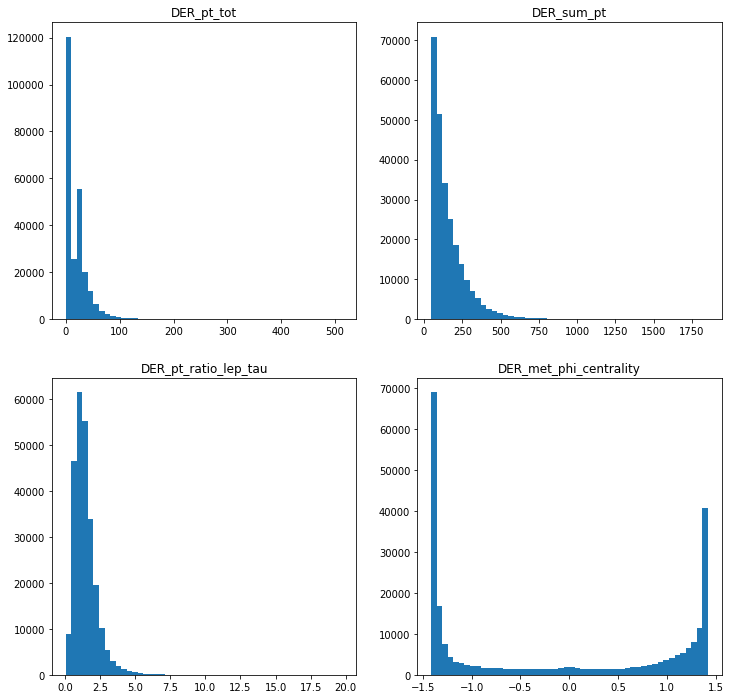

In [31]:
fig = plt.figure(figsize = (12,12))
plt.figure(1)
plt.subplot(221)
plt.hist(tX_reduced[:,4], 50, density=False);
plt.title(headers_reduced[4])
plt.subplot(222)
plt.hist(tX_reduced[:,5], 50, density=False);
plt.title(headers_reduced[5])
plt.subplot(223)
plt.hist(tX_reduced[:,6], 50, density=False);
plt.title(headers_reduced[6])
plt.subplot(224)
plt.hist(tX_reduced[:,7], 50, density=False);
plt.title(headers_reduced[7])

Text(0.5, 1.0, 'PRI_lep_pt')

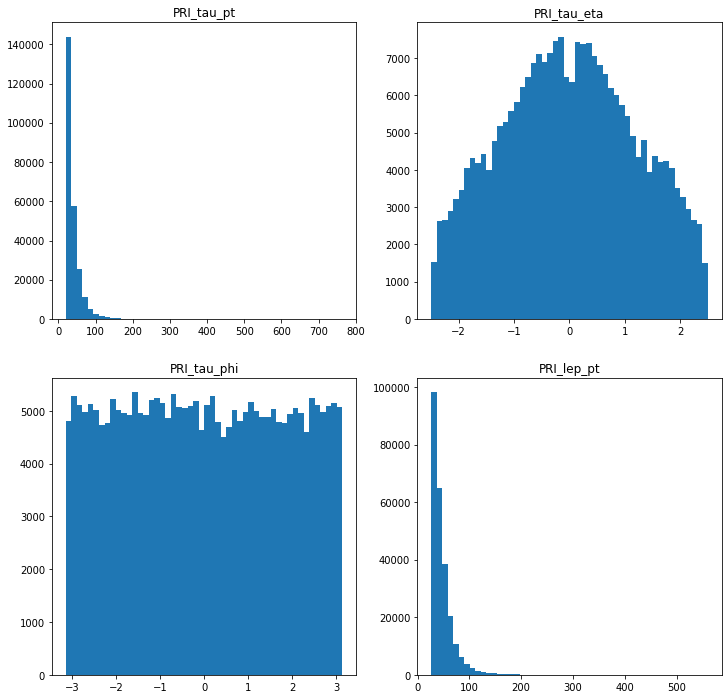

In [30]:
fig = plt.figure(figsize = (12,12))
plt.figure(1)
plt.subplot(221)
plt.hist(tX_reduced[:,8], 50, density=False);
plt.title(headers_reduced[8])
plt.subplot(222)
plt.hist(tX_reduced[:,9], 50, density=False);
plt.title(headers_reduced[9])
plt.subplot(223)
plt.hist(tX_reduced[:,10], 50, density=False);
plt.title(headers_reduced[10])
plt.subplot(224)
plt.hist(tX_reduced[:,11], 50, density=False);
plt.title(headers_reduced[11])

Text(0.5, 1.0, 'PRI_met_phi')

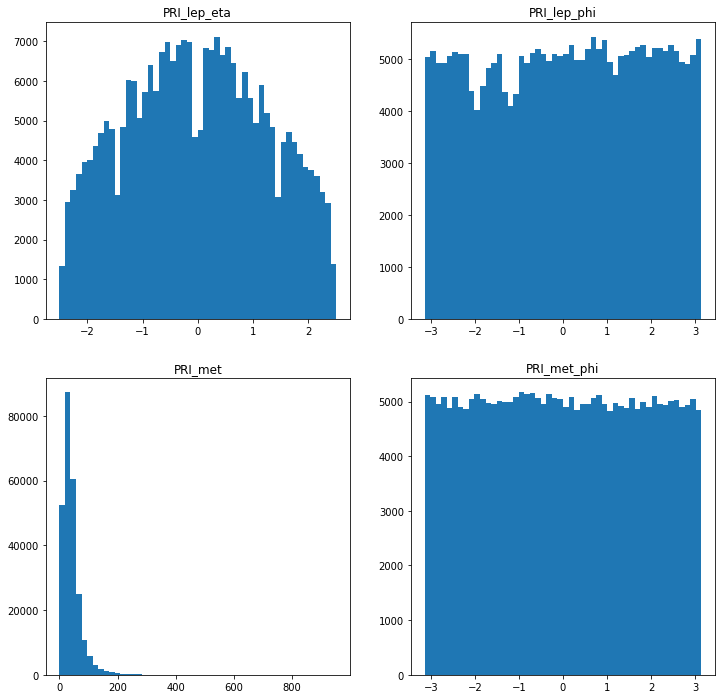

In [53]:
figure(figsize=(12, 12))
plt.figure(1)
plt.subplot(221)
plt.hist(tX_reduced[:,12], 50, density=False);
plt.title(headers_reduced[12])
plt.subplot(222)
plt.hist(tX_reduced[:,13], 50, density=False);
plt.title(headers_reduced[13])
plt.subplot(223)
plt.hist(tX_reduced[:,14], 50, density=False);
plt.title(headers_reduced[14])
plt.subplot(224)
plt.hist(tX_reduced[:,15], 50, density=False);
plt.title(headers_reduced[15])

Text(0.5, 1.0, 'PRI_jet_all_pt')

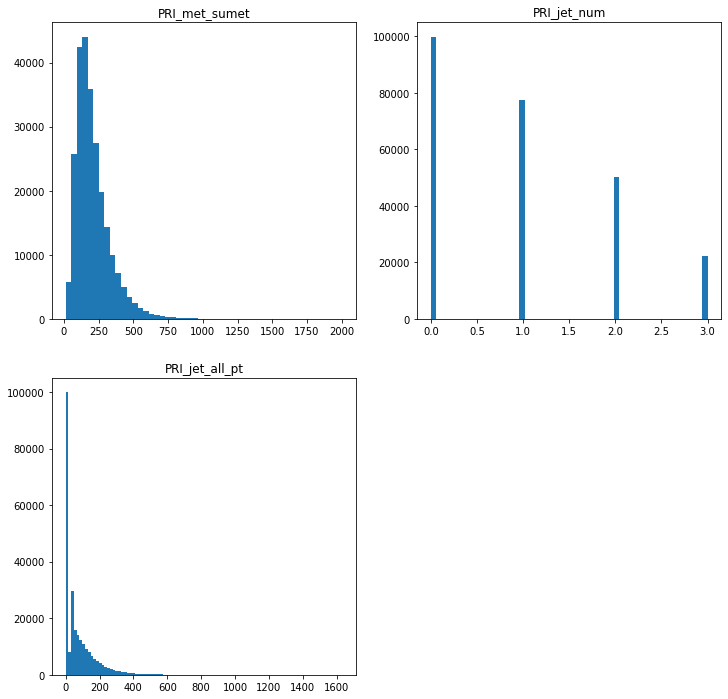

In [54]:
figure(figsize=(12, 12))
plt.figure(1)
plt.subplot(221)
plt.hist(tX_reduced[:,16], 50, density=False);
plt.title(headers_reduced[16])
plt.subplot(222)
plt.hist(tX_reduced[:,17], 50, density=False);
plt.title(headers_reduced[17])
plt.subplot(223)
plt.hist(tX_reduced[:,18], 100, density=False);
plt.title(headers_reduced[18])


There are some interesting distributions. There is a strange gap after 0 in the last feature PRI_jet_all_pt. 

## Feature Processing

First, we must decompose the categorical data by one hot encoding them into more features.

In [42]:
# The possible entries of feature PRI_jet_num are 0, 1, 2, 3
inds0 = np.where(tX_reduced[:, 17] == 0)
inds1 = np.where(tX_reduced[:, 17] == 1)
inds2 = np.where(tX_reduced[:, 17] == 2)
inds3 = np.where(tX_reduced[:, 17] == 3)

# initialize new columns as zeros
pri_jet0 = np.zeros(tX_reduced.shape[0])
pri_jet1 = np.zeros(tX_reduced.shape[0])
pri_jet2 = np.zeros(tX_reduced.shape[0])
pri_jet3 = np.zeros(tX_reduced.shape[0])

# set ones to appropriate columns
pri_jet0[inds0] = 1
pri_jet1[inds1] = 1
pri_jet2[inds2] = 1
pri_jet3[inds3] = 1

# concatenate new features to tX
tX_reduced = np.delete(tX_reduced, 17, axis = 1)
tX_reduced = np.column_stack((tX_reduced, pri_jet0, pri_jet1, pri_jet2, pri_jet3))
print(tX_reduced.shape)

(249999, 22)


## Functions

1) least_squares_GD(y, tx, initial_w,max_iters, gamma)

2) least_squares_SGD(y, tx, initial_w,max_iters, gamma)

3) least_squares(y, tx)

4) ridge_regression(y, tx, lambda_)

5) logistic regression(y, tx, initial_w, max_iters, gamma)

6) reg_logistic_regression(y, tx, lambda_,initial_w, max_iters, gamma)

## Generate predictions and save ouput in csv format for submission:

In [10]:
DATA_TEST_PATH = '' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [31]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)